## Read MNIST Dataset
https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [18]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        



In [19]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './MNIST'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')#/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')#/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')#/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')#/t10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [20]:
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

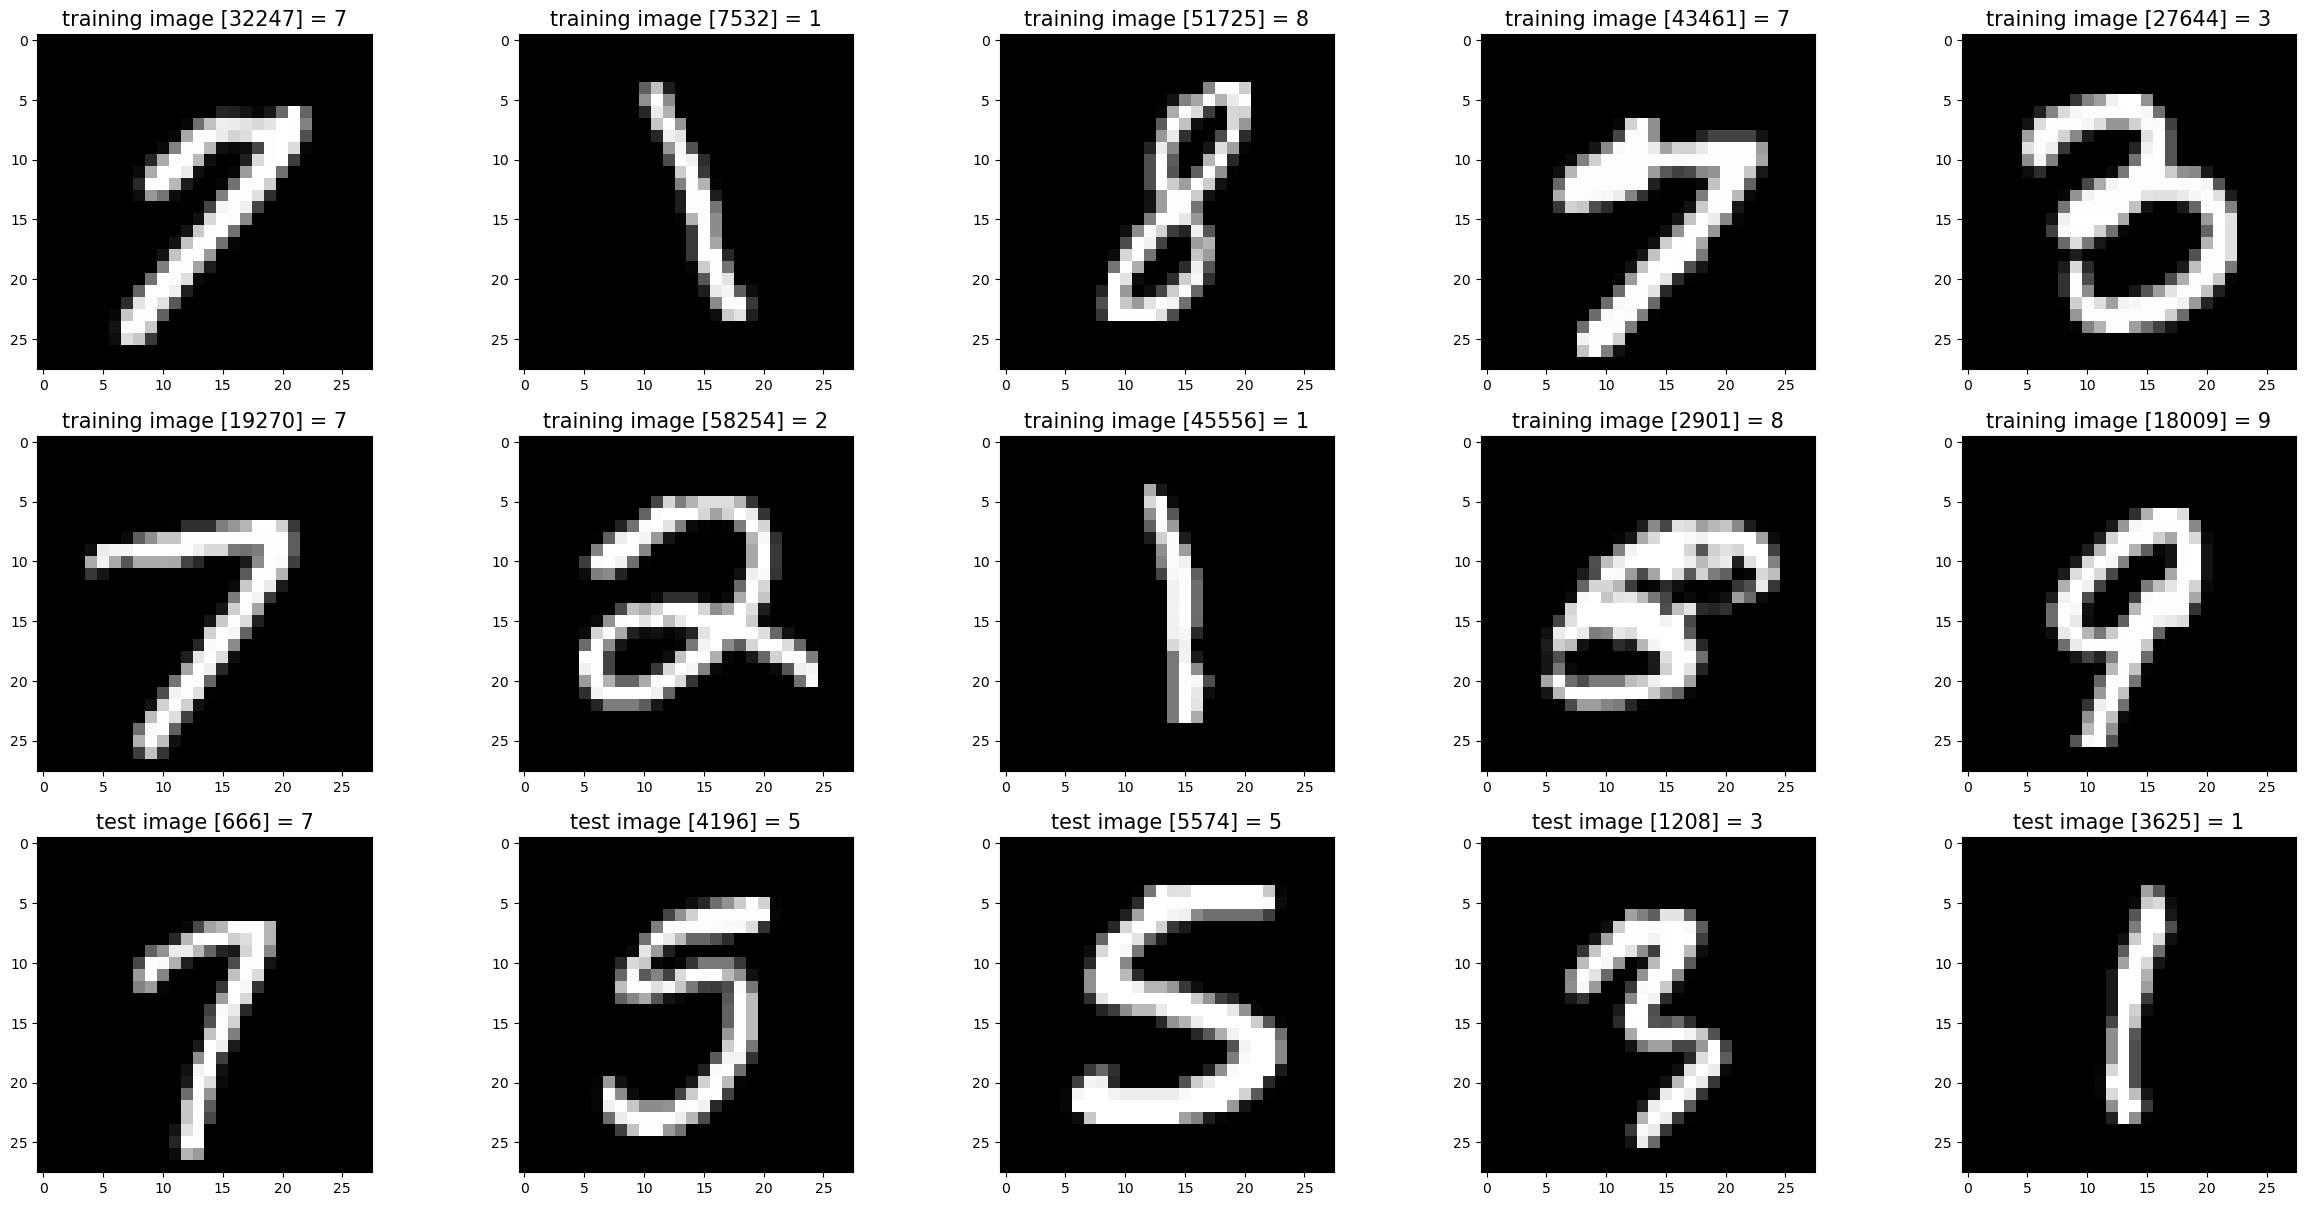

In [21]:
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [28]:
x_train[:10]

[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
         253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,  49, 23

In [29]:
y_train[:10]

array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [30]:
len(x_train), len(x_test)

(60000, 10000)

## Support Vector Machine

In [31]:
#import pandas as pd
#import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [32]:
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'rbf',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(x_train,y_train)

# Store the predicted values into y_pred
Y_pred = svmModel.predict(x_test)

# Display the accuracy upto 2 decimal places
print('Accuracy in SVC = ', round(accuracy_score(y_test, Y_pred)*100,2))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [34]:
len(x_train[0])

28

In [ ]:
flat_data_arr=[] #input arraytarget_arr=[] #output arraydatadir='/content/drive/MyDrive/ML' 
#path which contains all the categories of imagesfor i in Categories:
    
    print(f'loading... category : {i}')    path=os.path.join(datadir,i)    for img in os.listdir(path):        img_array=imread(os.path.join(path,img))        img_resized=resize(img_array,(150,150,3))        flat_data_arr.append(img_resized.flatten())        target_arr.append(Categories.index(i))    print(f'loaded category:{i} successfully')flat_data=np.array(flat_data_arr)target=np.array(target_arr)df=pd.DataFrame(flat_data) #dataframedf['Target']=targetx=df.iloc[:,:-1] #input data y=df.iloc[:,-1] #output data